# Exercise 0: Build your first NN model  

## Train the NN model to convert from Celsius to Fahrenheit   
In this notebook, we will solve the problem of converting from Celsius to Fahrenheit, where the approximate formula is:

$$ f = c \times 1.8 + 32 $$

This is a simple example. But it shows us the whole process of how to solve problems using deep learning methods, including data preparation, create the model, train the model, study its performance, use the model to predict new data, save the model, etc.

Before running any code, we do the following two steps:
1. Reset the runtime by going to **Runtime -> Reset all runtimes** in the menu above. 
2. Select **GPU** by going to **Runtime -> Change runtime type -> Hardware accelerator** in the menu above. 

## [Install and Import dependencies]

Since we need to use the latest tensorflow version, which is Tensorflow 2.0 beta. We need to install it. The default Tensorflow version in Colab is r1.14.0. 

- `numpy`: for matrix computation 
- `matplotlib.pyplot`: for graph plotting and display
- `tensorflow`: the main deep learning toolbox

Here, we're calling tensorflowt `tf` for ease of use. We also tell it to only display errors.


In [0]:
 ## Install tensorflow 2.0.0 beta version (GPU VERSION)
 !pip install tensorflow-gpu==2.0.0-beta1 

     |████████████████████████████████| 348.9MB 102kB/s 
     |████████████████████████████████| 501kB 40.2MB/s 
     |████████████████████████████████| 3.1MB 38.0MB/s 


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow 
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.0.0-beta1


In [0]:
# To ignore some warning message
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## [Data Preparation]  
This is a simple task. x and y are both 1-dimension scalars. We use *numpy* to create the artificial data by ourselves.

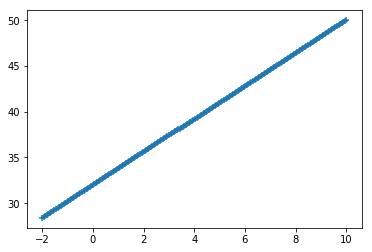

In [0]:
# create N=200 samples in the range [-2, 10)
N = 200
x = np.linspace(-2, 10, N)
y = x*1.8 + 32
plt.scatter(x,y,marker='+')

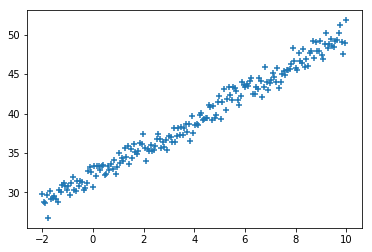

In [0]:
# we all some Gaussian noise to y to make the problem slightly difficult.
noise = np.random.normal(0,1,N)
y = y + noise

plt.scatter(x,y,marker ='+')

### Split the dataset into train set and test set  

We use 80% of the dataset as training data, and the rest used as test data.

In [0]:
N = 100
c = list(zip(x,y))
np.random.shuffle(c)
x[:], y[:]= zip(*c)

train_size = int(0.8*N)

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

## [Construct the model]  
Next create the model. We will use simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron. 

We use tf.keras.Sequential API to build our model.  

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)



In [0]:
batch_size = 64

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

**Note**

You will often see the layers defined inside the model definition:

```python
model = tf.keras.model.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

In [0]:
# To summarize the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=['mae'])

## [Train the model]  
Train the model by calling the `fit` method. 

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted. 

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

We use TensorBoard to visualize the training process.

In [0]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import datetime

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=500, batch_size=batch_size,
                    callbacks=[tensorboard_callback])
print("Finished training the model")

### TensorBoard for visualization

In [0]:
# Use TensorBoard to visualize the training process
%tensorboard --logdir logs/fit

### history object for visualization  


The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`. 

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement towards the end.

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
# plt.savefig('./loss.png')

### Looking at the layer weights

In [0]:
print("These are the layer variables: {}".format(model.layers[0].get_weights()))

The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

##[Evaluate the model]

It is always a good practice to evaludate our models on held out samples.
We use the training data to learn the neural networks parameters, such as the weights and bias.
We use the validation data to verify whether our model is overfitting on the training data, to balance our model to get good performance on both training and validation data.
And finally, the test data is totally un-used in our development of our model. And its performance is generally fair enough to compare different models.  

**Note**
We use test data as validation data in this example.

In [0]:
score = model.evaluate(x_test, y_test)
print("Test mse loss: ", score[0], "Test mae: ", score[1])

## [Use the model to predict labels]  
Now you have a model that has been trained to learn the relationship between `x_train` and `y_train`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees. 

So, for example, if the Celsius value is 100, what do you think the Fahrenheit result will be? Take a guess before you run this code.



In [0]:
print(model.predict([100.0]))

The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well. Since the data are noisy.

### To review


*   We created a model with a Dense layer
*   We trained it with 40000 examples (80 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)

##[Save the model and Restore]



In [0]:
# Save the model
model.save('my_model.h5')

In [0]:
#del model   # deletes the exsiting model

# Recreate the exact same model purely from the file
new_model = tf.keras.models.load_model('my_model.h5')